Boolean Function: AND
Final Weights: [-3.  2.  1.]
Number of errors after training: 0


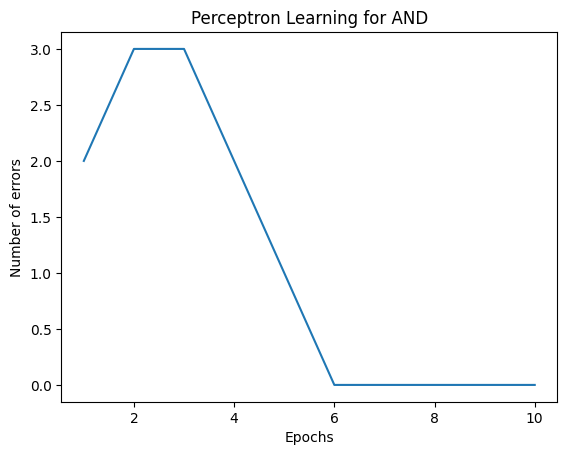

Boolean Function: OR
Final Weights: [-1.  1.  1.]
Number of errors after training: 0


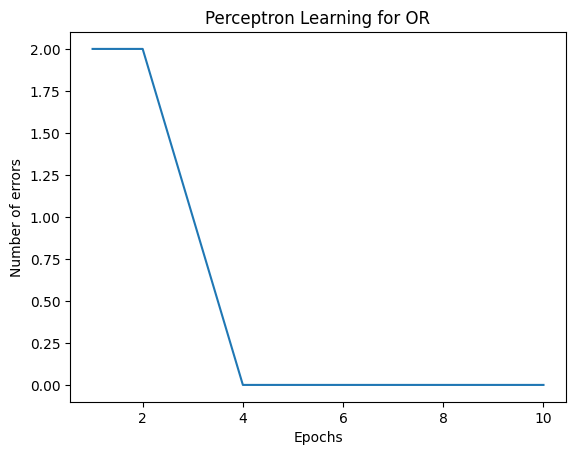

Boolean Function: NAND
Final Weights: [ 2. -2. -1.]
Number of errors after training: 0


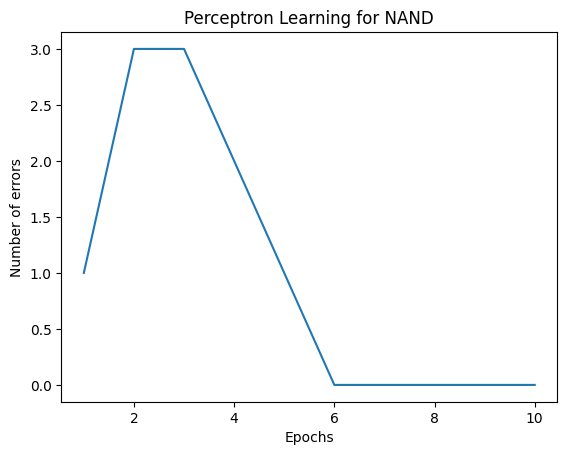

Boolean Function: XOR
Final Weights: [ 0. -1.  0.]
Number of errors after training: 4


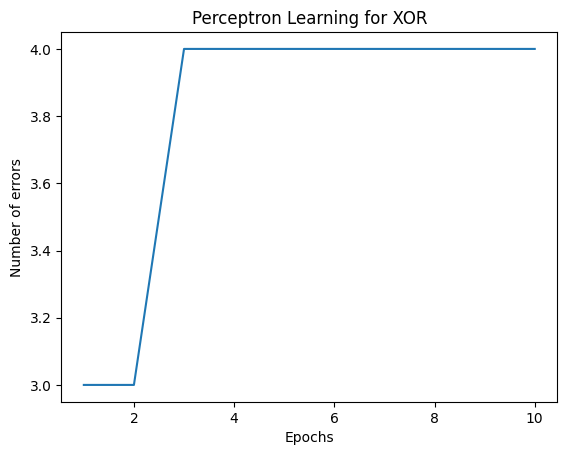

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_size, lr=1, epochs=10):
        self.W = np.zeros(input_size + 1)
        self.epochs = epochs
        self.lr = lr

    def activation(self, x):
        return 1 if x >= 0 else 0

    def predict(self, x):
        x = np.insert(x, 0, 1)  # Insert bias
        z = self.W.dot(x)
        a = self.activation(z)
        return a

    def fit(self, X, d):
        errors = []
        for _ in range(self.epochs):
            error = 0
            for i in range(d.shape[0]):
                y_pred = self.predict(X[i])
                e = d[i] - y_pred
                error += int(e != 0)
                self.W = self.W + self.lr * e * np.insert(X[i], 0, 1)
            errors.append(error)
        return errors


# Define the boolean functions
boolean_functions = {
    'AND': np.array([[0, 0], [0, 1], [1, 0], [1, 1]]),
    'OR': np.array([[0, 0], [0, 1], [1, 0], [1, 1]]),
    'NAND': np.array([[0, 0], [0, 1], [1, 0], [1, 1]]),
    'XOR': np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
}

# Define the desired outputs
desired_outputs = {
    'AND': np.array([0, 0, 0, 1]),
    'OR': np.array([0, 1, 1, 1]),
    'NAND': np.array([1, 1, 1, 0]),
    'XOR': np.array([0, 1, 1, 0])
}

# Train and display results
for function in boolean_functions:
    print("Boolean Function:", function)
    X = boolean_functions[function]
    d = desired_outputs[function]

    perceptron = Perceptron(input_size=X.shape[1])
    errors = perceptron.fit(X, d)
    print("Final Weights:", perceptron.W)
    print("Number of errors after training:", errors[-1])

    plt.plot(range(1, perceptron.epochs + 1), errors)
    plt.xlabel('Epochs')
    plt.ylabel('Number of errors')
    plt.title('Perceptron Learning for ' + function)
    plt.show()
